In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
data = pd.read_csv('./minute_weather.csv')
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [8]:
data.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [9]:
data.shape

(1587257, 13)

# data sampling

In [12]:
data['rowID'].dtypes

dtype('int64')

In [3]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [4]:
sampled_df.shape

(158726, 13)

# Statistics

In [5]:
# sampled_df.T.describe()

In [6]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


# Clean data

In [7]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [8]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [9]:
sampled_df = sampled_df.dropna()

In [10]:
sampled_df.shape

(158680, 11)

In [11]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

# select data feature

In [12]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [13]:
selected_df = sampled_df[features]

In [14]:
selected_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

# scale the feature by standardscaler

In [15]:
x = StandardScaler().fit_transform(selected_df)

In [17]:
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

# use k-means algo

In [19]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(x)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
centers = model.cluster_centers_

In [21]:
centers

array([[-1.18326082, -0.87168799,  0.44691881,  1.98203903,  0.53851078,
         1.94322866,  0.90984456],
       [-0.70289656,  0.53648974,  0.17541363, -0.58465148,  0.34508697,
        -0.59815146, -0.10957835],
       [-0.83665663, -1.20079995,  0.37582692,  0.36700123,  0.47429266,
         0.35484457,  1.36245836],
       [ 1.19057401, -0.25522069, -1.15497259,  2.1248264 , -1.05348098,
         2.24173171, -1.13466563],
       [ 1.36789679, -0.08207994, -1.20655935, -0.04827941, -1.07538655,
        -0.02787976, -0.97754848],
       [-0.16229206,  0.86348197, -1.31121085, -0.58973563, -1.16699215,
        -0.60506793, -0.64215653],
       [ 0.06004617, -0.78805927, -1.19740293, -0.57075846, -1.04350253,
        -0.58534585,  0.87820712],
       [ 0.24613445, -0.99549304,  0.6582199 , -0.54764359,  0.84813457,
        -0.53037541,  1.16068513],
       [ 0.72183681,  0.44370025,  0.28618869, -0.53559823,  0.47361209,
        -0.54174869, -0.76866751],
       [ 0.23405125,  0.3206

# plots

In [36]:
def pd_centers(featureName, centers):
    
    featureName = list(featureName)
    featureName.append('predict')
#     print(featureName)
    z = [np.append(A, index) for index, A in enumerate(centers)]
    
    df = pd.DataFrame(z, columns=featureName)
#     print(df['predict'].dtypes)
    df['predict'] = df['predict'].astype(np.int64)
    return df
P = pd_centers(features, centers)

In [41]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'predict', color = my_colors, marker='o')

# dry days

In [42]:
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,predict
0,-1.183261,-0.871688,0.446919,1.982039,0.538511,1.943229,0.909845,0
1,-0.702897,0.536490,0.175414,-0.584651,0.345087,-0.598151,-0.109578,1
2,-0.836657,-1.200800,0.375827,0.367001,0.474293,0.354845,1.362458,2
3,1.190574,-0.255221,-1.154973,2.124826,-1.053481,2.241732,-1.134666,3
4,1.367897,-0.082080,-1.206559,-0.048279,-1.075387,-0.027880,-0.977548,4
5,-0.162292,0.863482,-1.311211,-0.589736,-1.166992,-0.605068,-0.642157,5
6,0.060046,-0.788059,-1.197403,-0.570758,-1.043503,-0.585346,0.878207,6
7,0.246134,-0.995493,0.658220,-0.547644,0.848135,-0.530375,1.160685,7
8,0.721837,0.443700,0.286189,-0.535598,0.473612,-0.541749,-0.768668,8
9,0.234051,0.320619,1.887954,-0.651815,-1.551758,-0.576694,-0.283850,9


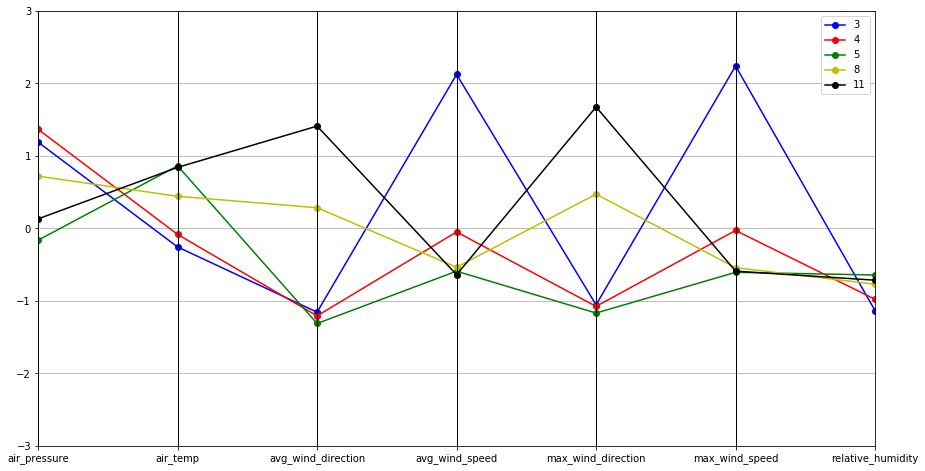

In [43]:
parallel_plot(P[P['relative_humidity'] < -0.5])